In [3]:
import os, nest_asyncio
os.chdir("/Users/1zuu/Desktop/LLM RESEARCH 2024/RAGDynamics")
from llama_parse import LlamaParse
from configure_llm import *
nest_asyncio.apply()

In [6]:
! wget "https://drive.usercontent.google.com/uc?id=1tZJhcpepLRdQFJFCFX50QIqLyLgqzZsY&export=download" -O ./data/00/manga.pdf

--2024-03-16 09:52:15--  https://drive.usercontent.google.com/uc?id=1tZJhcpepLRdQFJFCFX50QIqLyLgqzZsY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.10.132
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.10.132|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1tZJhcpepLRdQFJFCFX50QIqLyLgqzZsY&export=download [following]
--2024-03-16 09:52:15--  https://drive.usercontent.google.com/download?id=1tZJhcpepLRdQFJFCFX50QIqLyLgqzZsY&export=download
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 3041634 (2.9M) [application/octet-stream]
Saving to: ‘./data/00/manga.pdf’

./data/00/manga.pdf 100%[===================>]   2.90M  1.91MB/s    in 1.5s    

2024-03-16 09:52:18 (1.91 MB/s) - ‘./data/00/manga.pdf’ saved [3041634/3041634]



# Data Parsing

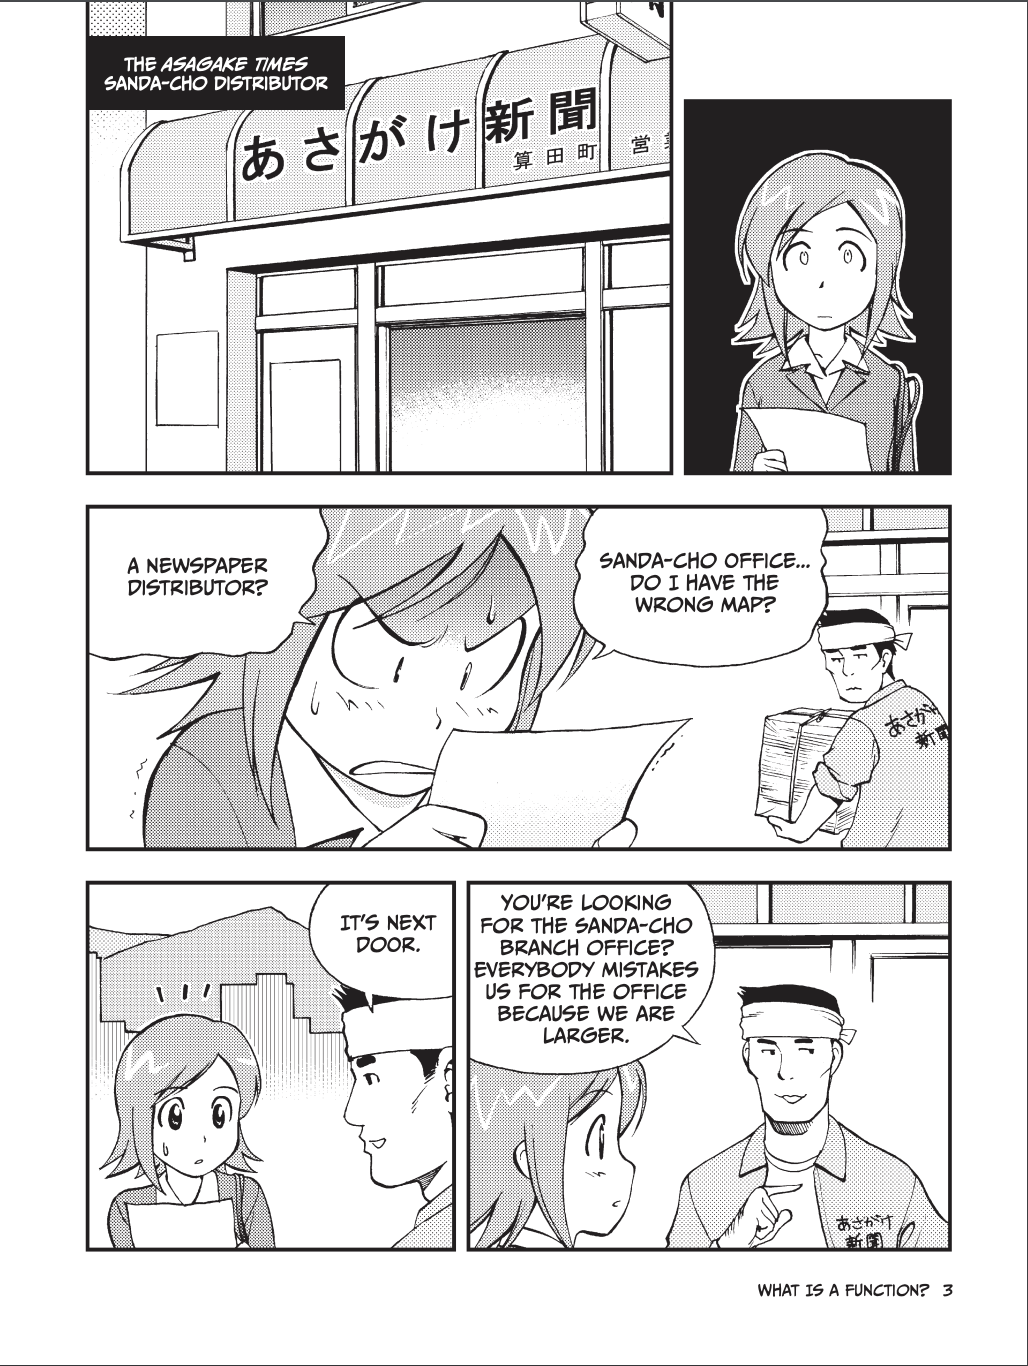

### 01. Without parsing instructions

In [7]:
vanilaParsing = LlamaParse(result_type="markdown").load_data("./data/00/manga.pdf")
print(vanilaParsing[0].text[100:1000])

Started parsing the file under job_id caf216d6-4718-4186-9cad-11aada75b8f3

The Asagake Times Sanda-Cho Distributor

A newspaper distributor? do I have the wrong map?

You’re looking It’s next for the Sanda-cho door. branch office? Everybody mistakes us for the office because we are larger. What Is a Function? 3
---
## Calculating the Derivative of a Constant, Linear, or Quadratic Function

|1.|Let’s find the derivative of constant function f(x) = α. The differential coefficient of f(x) at x = a is|
|---|---|
| |lim ε→0 (f(a + ε) - f(a)) / ε = lim ε→0 (α - α) = lim ε→0 0 = 0|
| |Thus, the derivative of f(x) is f′(x) = 0. This makes sense, since our function is constant—the rate of change is 0.|

Note: The differential coefficient of f(x) at x = a is often simply called the derivative of f(x) at x = a, or just f′(a).

|2.|Let’s calculate the derivative of linear function f(x) = αx + β. The derivative of f(x) at x = α is|
|---|---|
| |lim ε→0 (f(α + ε) - f(a)) = 


### 02. Using parsing instructions

In [9]:
parsingInstructionManga = """The provided document is a manga comic book, most page do NOT have title.
It does not contain table.
Try to reconstruct the dialog happening in a cohesive way."""
withInstructionParsing = LlamaParse(
                                    result_type="markdown", 
                                    parsing_instruction=parsingInstructionManga
                                    ).load_data("./data/00/manga.pdf")

Started parsing the file under job_id 0fc2d077-03cc-4cef-9ebf-075195f0c014


In [10]:
target_page=1
print(vanilaParsing[0].text.split('\n---\n')[target_page])
print("\n\n------------------------------------------------------------\n\n")
print(withInstructionParsing[0].text.split('\n---\n')[target_page])

The Asagake Times Sanda-Cho Distributor

A newspaper distributor? do I have the wrong map?

You’re looking It’s next for the Sanda-cho door. branch office? Everybody mistakes us for the office because we are larger. What Is a Function? 3


------------------------------------------------------------


The Asagake Times Sanda-Cho Distributor

A newspaper distributor? do I have the wrong map?

You’re looking It’s next for the Sanda-cho door. branch office? Everybody mistakes us for the office because we are larger. What Is a Function? 3
